In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
import pandas as pd
df=pd.read_csv('D:/Python file/Project Datasets/FinalEval/US_Covid19.csv')  #Path location of the dataset
df.head()  #Checking out the top 5 rows of the dataset

,Province_State,Country_Region,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,21-05-2020 2.32,32.3182,-86.9023,13052,522,NaN,12530,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,21-05-2020 2.32,61.3707,-152.4044,401,10,352.0,39,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,21-05-2020 2.32,-14.2710,-170.1320,0,0,NaN,0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,21-05-2020 2.32,33.7298,-111.4312,14906,747,3773.0,10386,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,21-05-2020 2.32,34.9697,-92.3731,5003,107,3852.0,1044,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [3]:
df.shape    #Checking the dimensions of the dataset

(58, 18)

In [4]:
df.columns   #Checking out the columns of the dataset

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

# Dataset Description

Introduction:

    -> This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).
    
    -> Coronavirus is a family of viruses that can cause illness, which can vary from common cold and cough to sometimes more severe disease. 
    
    -> Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV) were such severe cases with the world already has faced. SARS-CoV-2 (n-coronavirus) is the new virus of the coronavirus family, which first discovered in 2019, which has not been identified in humans before.
    
    -> It is a contiguous virus which started from Wuhan in December 2019, Which later declared as Pandemic by WHO due to high rate spreads throughout the world. Currently (on the date 20 May 2020), this leads to a total of 300K+ Deaths across the globe, including 90K+ deaths alone in USA.The dataset  is provided to identify the deaths and recovered cases.
    
Features description:

-> There are 58 rows and 18 columns and their description is given below:

    1. Province_State - The name of the State within the USA.
     
    2. Country_Region - The name of the Country (USA).

    3. Last_Update - The most recent date the file was pushed (in MM/DD/YYYY HH:mm:ss).

    4. Lat - Latitude.

    5. Long - Longitude.

    6. Confirmed - Aggregated confirmed case count for the state.
 
    7. Deaths - Aggregated Death case count for the state.

    8. Recovered - Aggregated Recovered case count for the state.

    9. Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).

    10. FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.

    11. Incident_Rate - confirmed cases per 100,000 persons.

    12. People_Tested - Total number of people who have been tested.

    13. People_Hospitalized - Total number of people hospitalized.

    14. Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.

    15. UID - Unique Identifier for each row entry.

    16. ISO3 - Officialy assigned country code identifiers.

    17. Testing_Rate - Total number of people tested per 100,000 persons (Positive + Negative).

    18. Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.

# Our agenda in this project

We need to predict the number of deaths occured due to Covid19 at each regions in USA with the following dataset and for this data analysis, we need to approach regression analysis.

In [5]:
df.info()    #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long                  56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     int64  
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

There are some categorical features in this dataset and we need to handle them during further analysis

In [6]:
df.isnull().sum()   #Checking for null values in the dataset

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long                     2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

There are many missing values in this dataset and we need to replace them with values

In [7]:
#Filling up the missing data by calculating mean and using replace function with Numpy library
import numpy as np
df=df.replace(np.NaN,df.mean())

In [8]:
df.isnull().sum()   #Checking for null values in the dataset after replacing

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long                    0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

We can see that there are no missing data in this dataset and now we can proceed further by EDA process

# Exploratory Data Analysis 

In [9]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis

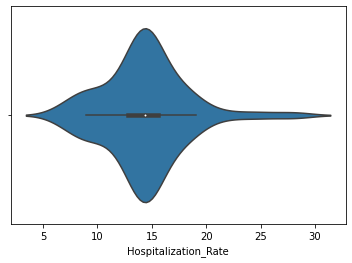

In [10]:
#Checking distribution of Hospitalization_Rate using violinplot
sns.violinplot(df['Hospitalization_Rate'])

#Maximum Range of values is distributed between 10-15

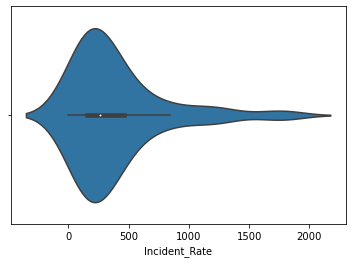

In [11]:
#Checking distribution of Incident_Rate using violinplot
sns.violinplot(df['Incident_Rate'])

#Maximum range of values is distributed between 0-500

#  Bivariate Analysis

   Province_State  Recovered
0        New York    61886.0
1           Texas    30341.0
2        Michigan    28234.0
3       Louisiana    26249.0
4      New Jersey    23945.0
5       Minnesota    12227.0
6       Tennessee    11783.0
7  North Carolina    11637.0
8            Iowa     8362.0
9       Wisconsin     7728.0


Text(0.5, 1.0, 'Top 10 states with highest recovered cases')

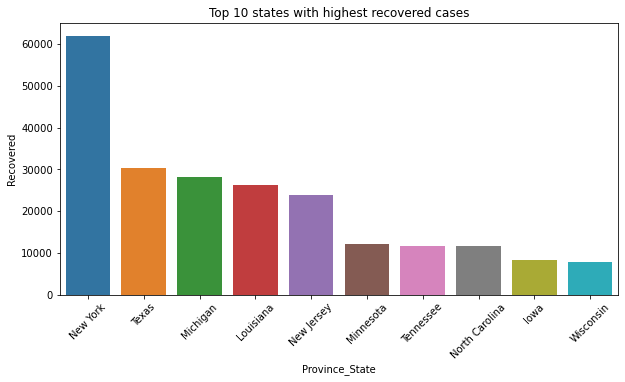

In [12]:
#Checking top 10 states with highest recovered cases
top_10 = df.groupby(by ='Province_State')['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)

#Visualizing by using bar plot
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Province_State'],top_10['Recovered'])
plt.xlabel('Province_State')
plt.ylabel('Recovered')
plt.title('Top 10 states with highest recovered cases')

We can see that NewYork has the maximum recovered cases with 61886 people recovered from the disease whereas Wisconsin has the minumum recovered cases with 7728 people recovered.

             Province_State  Testing_Rate
0              Rhode Island  11377.424690
1              North Dakota   7768.396797
2                  New York   7740.670204
3             Massachusetts   7108.491647
4  Northern Mariana Islands   6921.877267
5                New Mexico   6783.862680
6                 Louisiana   6151.487891
7                New Jersey   5982.117023
8      District of Columbia   5727.106946
9                      Utah   5604.065930


Text(0.5, 1.0, 'Top 10 states with highest Testing Rates')

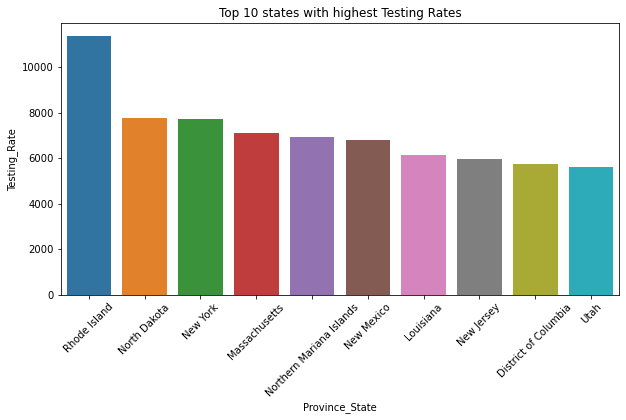

In [13]:
#Checking top 10 states with highest Testing Rates
top_10 = df.groupby(by ='Province_State')['Testing_Rate'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)

#Visualizing by using bar plot
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Province_State'],top_10['Testing_Rate'])
plt.xlabel('Province_State')
plt.ylabel('Testing_Rate')
plt.title('Top 10 states with highest Testing Rates')

The testing rates are maximum in Rhode Island, which is above 11000, whereas it is minimum in Utah with nearly 5600.

  Province_State  Active
0       New York  263848
1     New Jersey  116082
2       Illinois   95893
3  Massachusetts   82904
4     California   82500
5   Pennsylvania   63356
6        Florida   45375
7        Georgia   38104
8       Maryland   37207
9    Connecticut   29224


Text(0.5, 1.0, 'Top 10 states with highest Active cases')

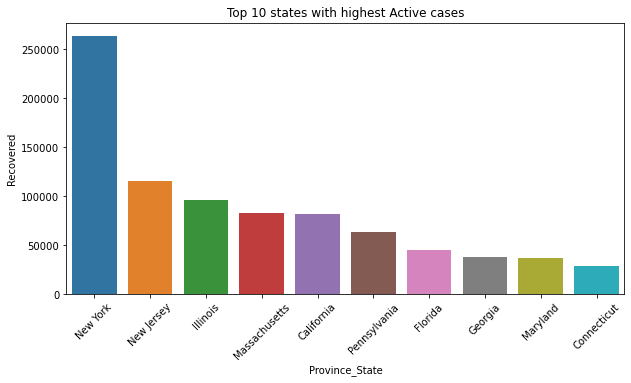

In [14]:
#Checking top 10 states with highest Active Cases
top_10 = df.groupby(by ='Province_State')['Active'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)

#Visualizing by using bar plot
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Province_State'],top_10['Active'])
plt.xlabel('Province_State')
plt.ylabel('Recovered')
plt.title('Top 10 states with highest Active cases')

We can see that the active cases are maximum in NewYork with nearly 260000 cases whereas the minimum active cases are in Connecticut with nearly 30000 cases.

  Province_State  Deaths
0       New York   28636
1     New Jersey   10749
2  Massachusetts    6066
3       Michigan    5060
4   Pennsylvania    4770
5       Illinois    4525
6    Connecticut    3529
7     California    3497
8      Louisiana    2608
9       Maryland    2123


Text(0.5, 1.0, 'Top 10 states with highest Deaths')

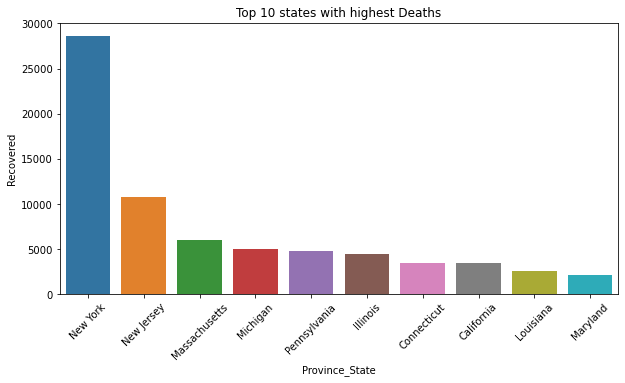

In [15]:
#Checking top 10 states with highest Deaths
top_10 = df.groupby(by ='Province_State')['Deaths'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)

#Visualizing by uisng bar plot
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Province_State'],top_10['Deaths'])
plt.xlabel('Province_State')
plt.ylabel('Recovered')
plt.title('Top 10 states with highest Deaths')

More number of deaths had occured in NewYork with more than 28000+ people dead whereas in Maryland there are minimum number of deaths with a value of 2123 which is very less.

             Province_State  Mortality_Rate
0                  Michigan        9.545549
1  Northern Mariana Islands        9.523810
2               Connecticut        9.044775
3            Virgin Islands        8.695652
4                  New York        8.080819
5                 Louisiana        7.384755
6                New Jersey        7.129119
7              Pennsylvania        7.001732
8             Massachusetts        6.818029
9                   Indiana        6.367425


Text(0.5, 1.0, 'Top 10 states highest Mortality_Rate')

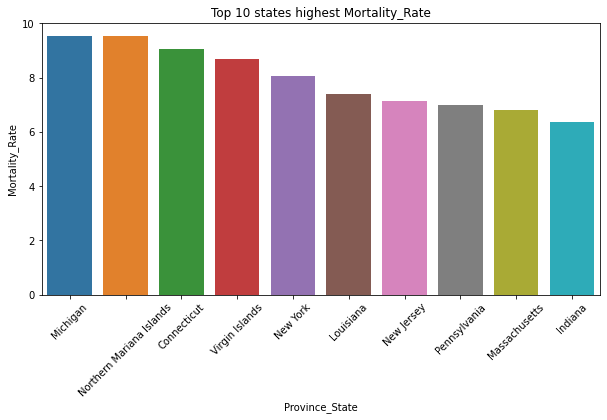

In [16]:
#Checking top 10 states with highest Mortality_Rate
top_10 = df.groupby(by ='Province_State')['Mortality_Rate'].sum().sort_values(ascending=False).head(10).reset_index()
print(top_10)

#Visualizing by using bar plot
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.barplot(top_10['Province_State'],top_10['Mortality_Rate'])
plt.xlabel('Province_State')
plt.ylabel('Mortality_Rate')
plt.title('Top 10 states highest Mortality_Rate')

Highest Mortality Rate is in Michigan whereas lowest mortality rate is in Indiana

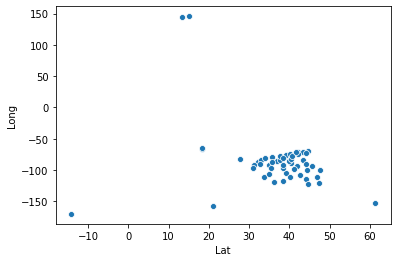

In [17]:
#Checking relationship of 2 columns using scatter plot
sns.scatterplot(x='Lat',y='Long',data=df)

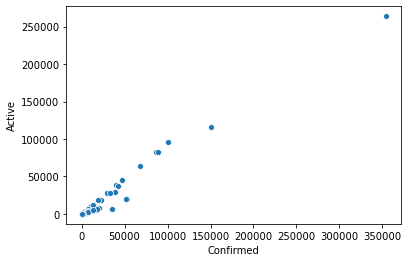

In [18]:
sns.scatterplot(x='Confirmed',y='Active',data=df)

Text(0, 0.5, 'Deaths')

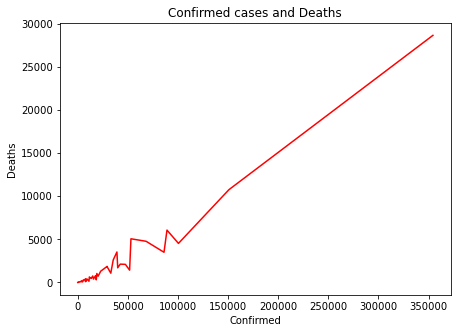

In [19]:
#Plotting line plot for checking relationship between Confirmed and Deaths
plt.figure(figsize=(7,5))
sns.lineplot(x="Confirmed", y="Deaths", data=df,color='red')
plt.xlabel('Confirmed')
plt.title("Confirmed cases and Deaths")
plt.ylabel('Deaths')

As the confirmed cases are increasing, the deaths are also increasing

# Multivariate Analysis

In [20]:
df.describe()    #Statistical summary of the dataset

,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.694329,48.873770,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,1898.951207,3.781861
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,2741.843521,12.829963
50%,38.978600,-86.797300,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,3501.526835,14.342541
75%,42.214075,-77.072550,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424690,28.054438


Observations:

1.There is a large difference between mean and median of columns like Confirmed, Deaths, Recovered and Active and this is due to   presence of outliers.

2.The Standard Deviation value is high for Confirmed and Active.

3.The minimum value for columns like Confirmed, Deaths and Active is 0.

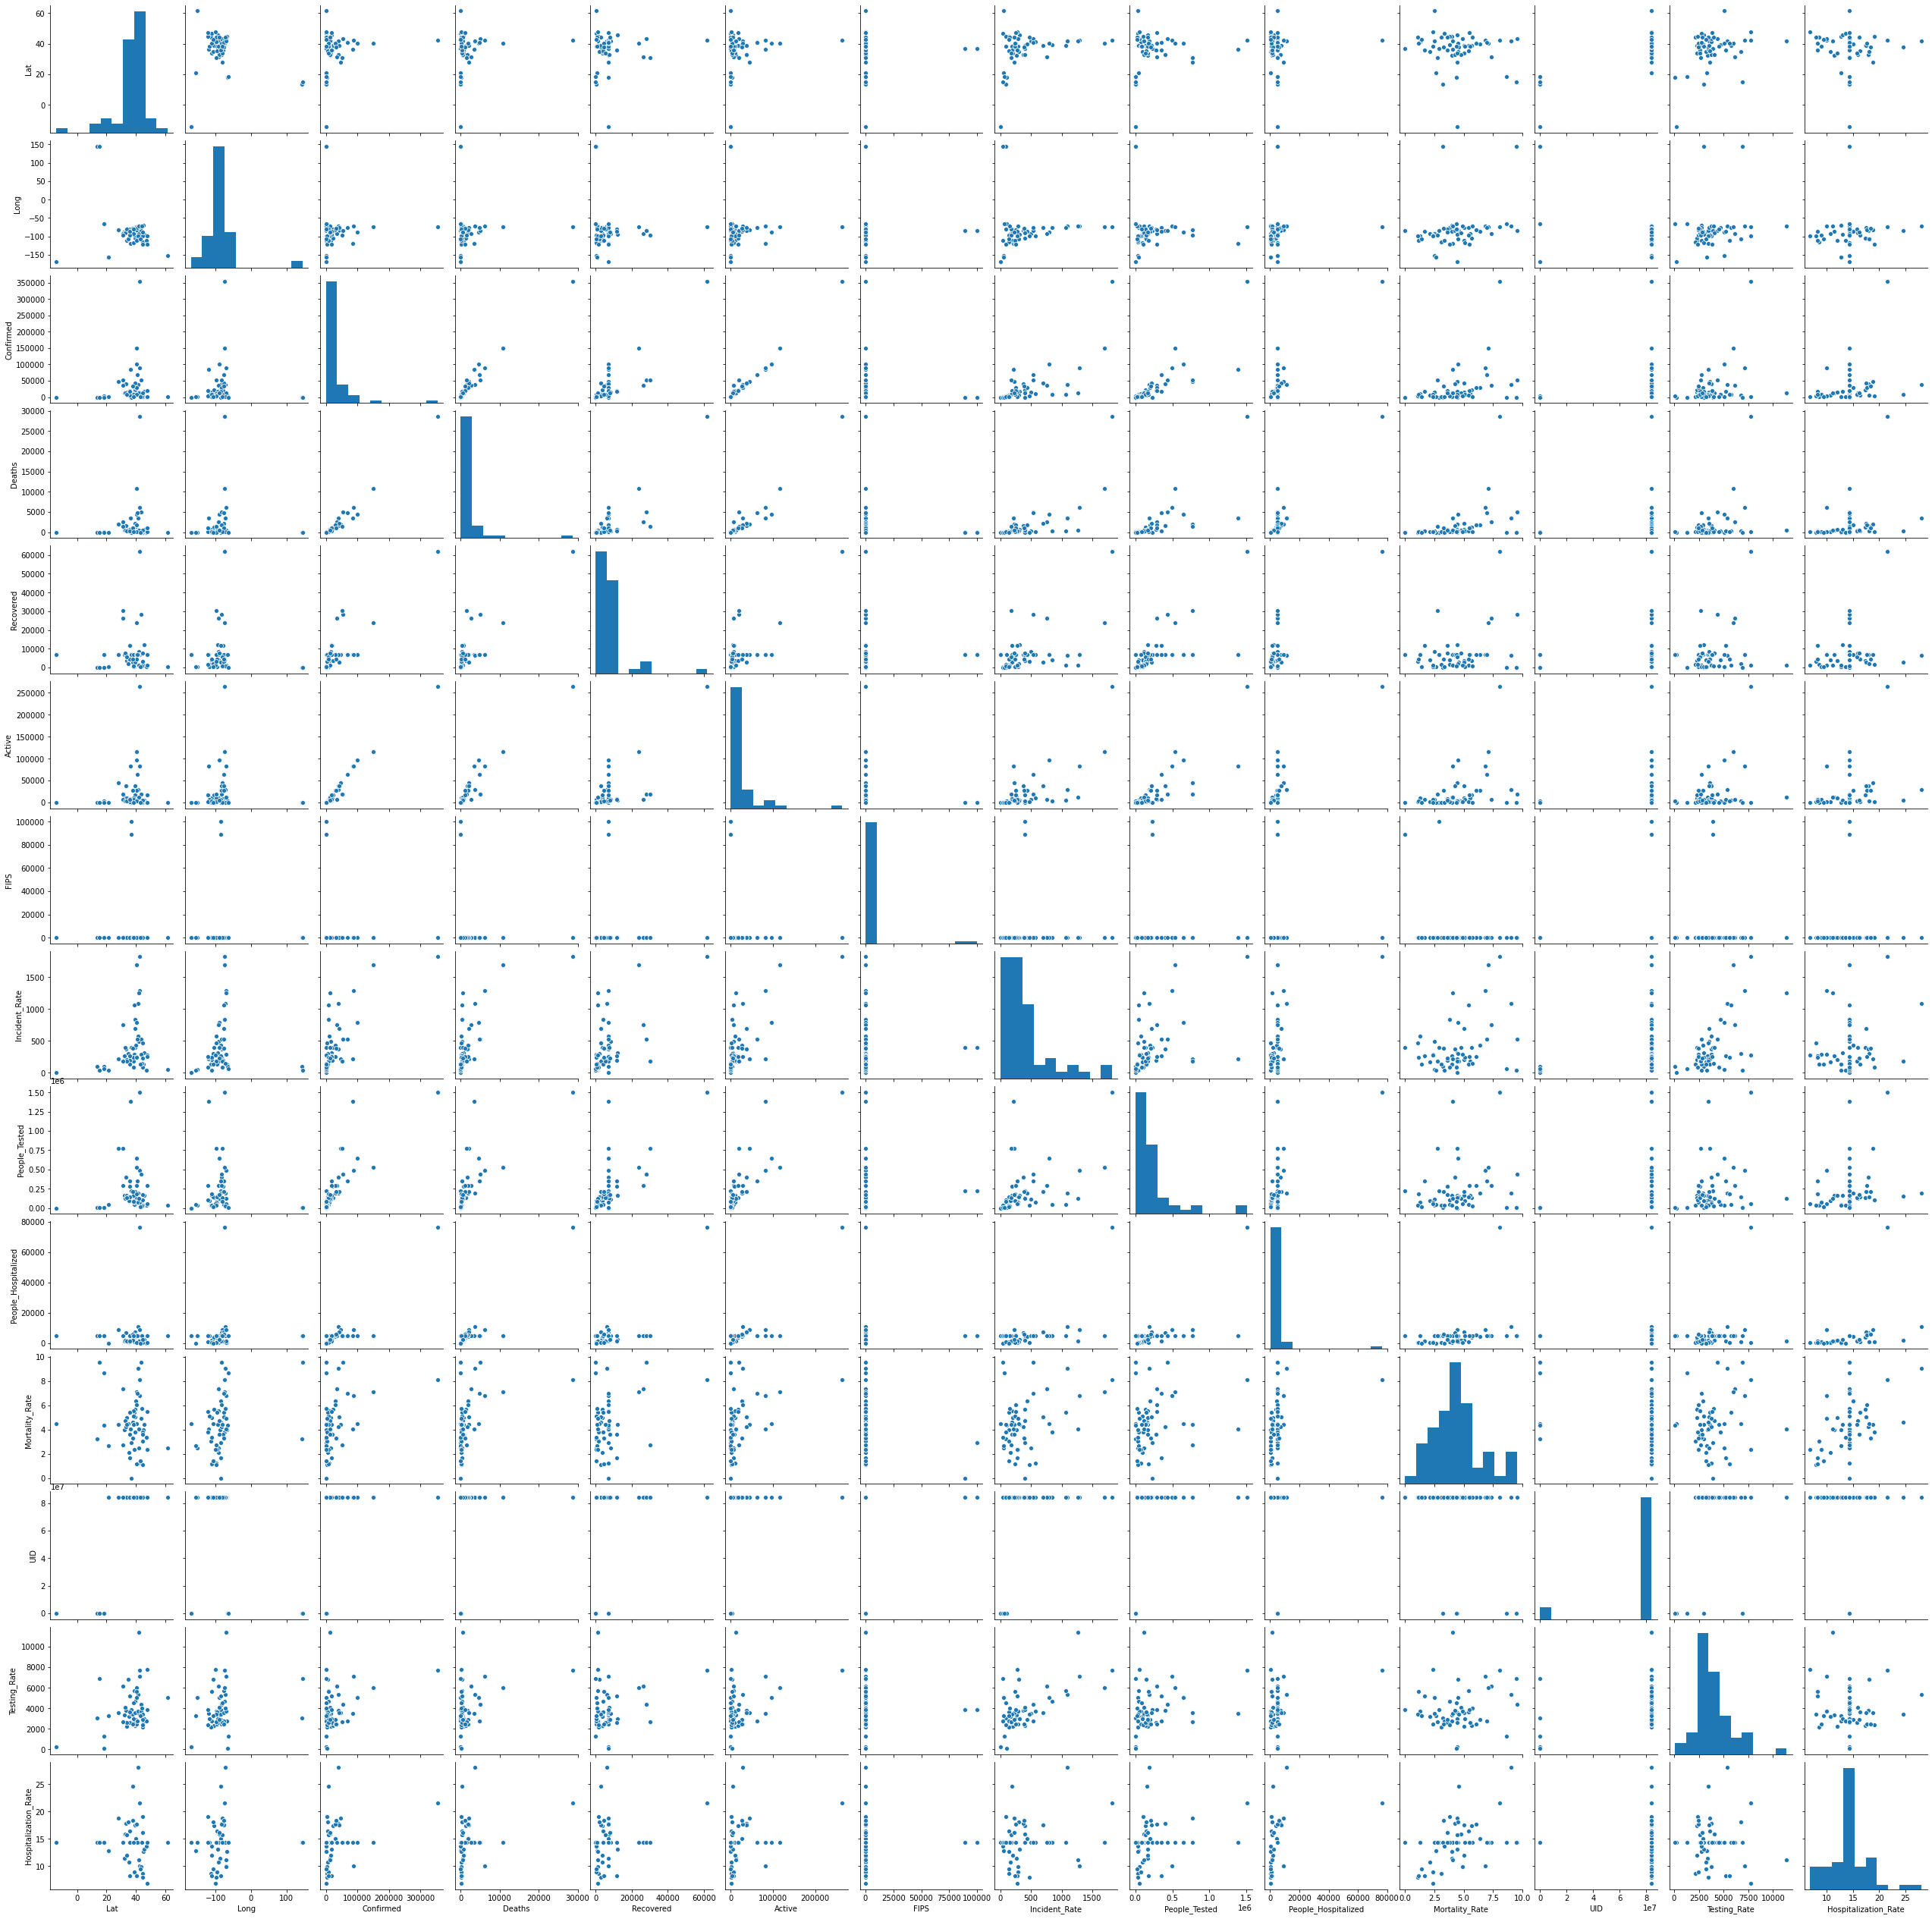

In [21]:
#Plotting pair plot for checking entire data relationship
sns.pairplot(data=df)

In [22]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120391,0.119685,0.030196,0.119635,-0.000404,0.245693,0.084769,2.645628e-02,-0.134906,7.727677e-01,0.309579,-6.625465e-02
Long,-0.278274,1.000000,0.009951,0.028690,-0.041588,0.011604,0.000396,0.041318,-0.077781,7.967739e-02,0.297192,-5.259975e-01,0.190191,7.138145e-02
Confirmed,0.120391,0.009951,1.000000,0.982191,0.822547,0.985218,-0.096696,0.708436,0.824136,8.692673e-01,0.382537,1.539717e-01,0.332464,2.874708e-01
Deaths,0.119685,0.028690,0.982191,1.000000,0.830223,0.954378,-0.075053,0.710105,0.739634,9.082786e-01,0.427127,1.200429e-01,0.344465,2.982254e-01
Recovered,0.030196,-0.041588,0.822547,0.830223,1.000000,0.725085,-0.000012,0.542795,0.711255,7.618294e-01,0.322160,1.303142e-01,0.220597,2.316917e-01
Active,0.119635,0.011604,0.985218,0.954378,0.725085,1.000000,-0.092276,0.700926,0.826144,8.359377e-01,0.367626,1.463538e-01,0.321395,2.845637e-01
FIPS,-0.000404,0.000396,-0.096696,-0.075053,-0.000012,-0.092276,1.000000,-0.000237,-0.000209,9.150251e-06,-0.262178,5.802216e-02,-0.000100,-1.176128e-04
Incident_Rate,0.245693,0.041318,0.708436,0.710105,0.542795,0.700926,-0.000237,1.000000,0.441669,5.510764e-01,0.353882,2.643102e-01,0.620621,1.960289e-01
People_Tested,0.084769,-0.077781,0.824136,0.739634,0.711255,0.826144,-0.000209,0.441669,1.000000,6.420913e-01,0.220200,2.356350e-01,0.230753,2.526802e-01
People_Hospitalized,0.026456,0.079677,0.869267,0.908279,0.761829,0.835938,0.000009,0.551076,0.642091,1.000000e+00,0.334335,6.697668e-09,0.270255,3.775863e-01


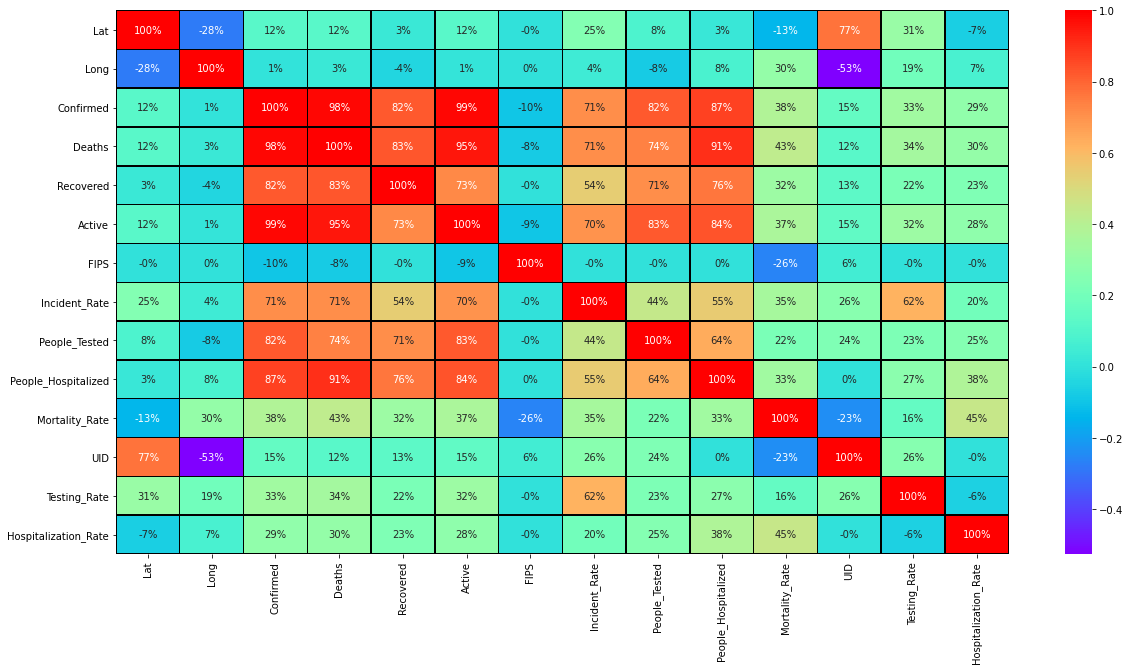

In [23]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(20,10))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='rainbow',annot=True)
plt.show()

Observations:

1.There are more positively correlated columns present.

2.Highest positively correlated columns are Active with Confirmed, which has 99% correlation and Confirmed with Deaths which has 98% correlation.

3.Most negatively correlated column is UID with Long, which has -53% correlation.

4.Positively correlated columns have high impact with the target variable whereas negatively correlated columns have less or zero impact with target variable.

In [24]:
#Dropping less important columns
df.drop(columns=['Country_Region','Last_Update','UID','ISO3'],axis=1,inplace=True)

In [25]:
df.head()

,Province_State,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,32.3182,-86.9023,13052,522,7007.428571,12530,1,266.194321,164450.0,1493.000000,3.999387,3353.942386,11.438860
1,Alaska,61.3707,-152.4044,401,10,352.000000,39,2,54.815493,37045.0,4897.454545,2.493766,5063.940017,14.342541
2,American Samoa,-14.2710,-170.1320,0,0,7007.428571,0,60,0.000000,124.0,4897.454545,4.458248,222.857246,14.342541
3,Arizona,33.7298,-111.4312,14906,747,3773.000000,10386,4,204.788838,165435.0,1792.000000,5.011405,2272.859351,12.022005
4,Arkansas,34.9697,-92.3731,5003,107,3852.000000,1044,5,165.782801,96258.0,535.000000,2.138717,3189.670370,10.693584


We had dropped the columns which is not giving much importance to the dataset and also the columns which has very less correlation with the target variable.

# Converting Categorical data into numeric data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Lat                   58 non-null     float64
 2   Long                  58 non-null     float64
 3   Confirmed             58 non-null     int64  
 4   Deaths                58 non-null     int64  
 5   Recovered             58 non-null     float64
 6   Active                58 non-null     int64  
 7   FIPS                  58 non-null     int64  
 8   Incident_Rate         58 non-null     float64
 9   People_Tested         58 non-null     float64
 10  People_Hospitalized   58 non-null     float64
 11  Mortality_Rate        58 non-null     float64
 12  Testing_Rate          58 non-null     float64
 13  Hospitalization_Rate  58 non-null     float64
dtypes: float64(9), int64(4), object(1)
memory usage: 6.5+ KB


Province_State have categorical data and we need to convert it into numerical data. We can do that by using LabelEncoder

In [27]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['Province_State']    #The columns to be converted
for col in columns: 
    df[col] = le.fit_transform(df[col])

In [28]:
df['Province_State'].dtype   #Checking the datatype after conversion

dtype('int32')

We can see that the categorical data has been converted into numerical data using LabelEncoder and now we can proceed with further analysis

# Checking skewness

In [29]:
df.skew()

Province_State          0.000000
Lat                    -2.250097
Long                    3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

There are both positive and negative skewness in this dataset and we need to treat them

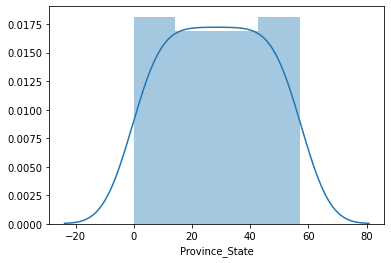

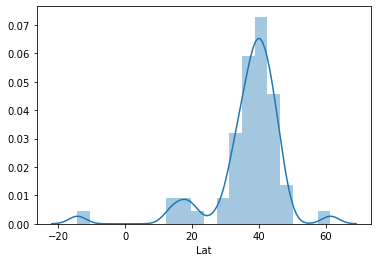

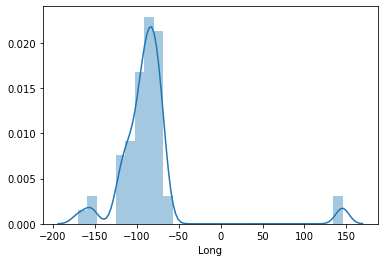

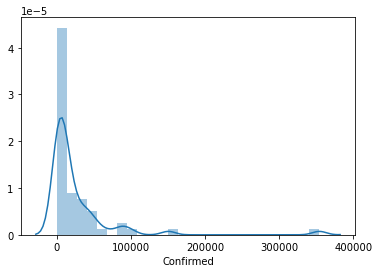

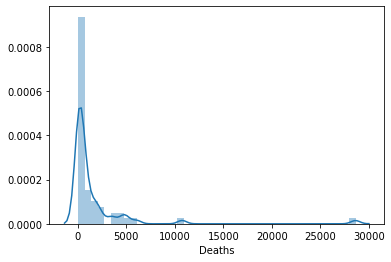

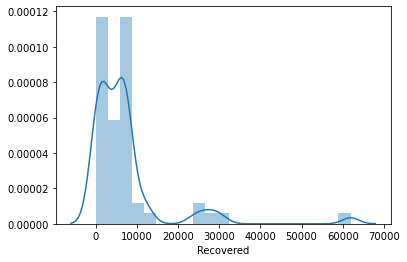

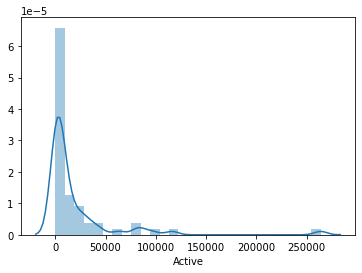

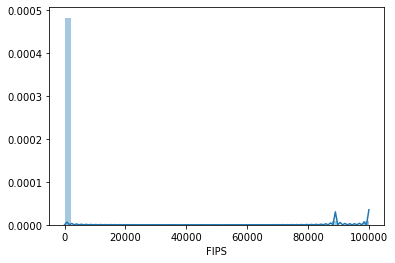

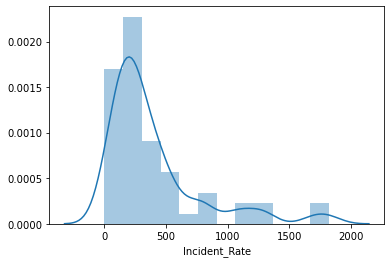

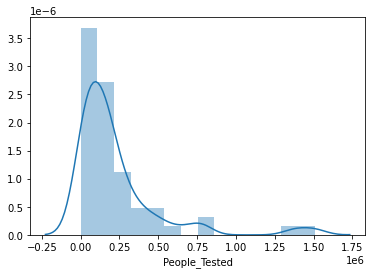

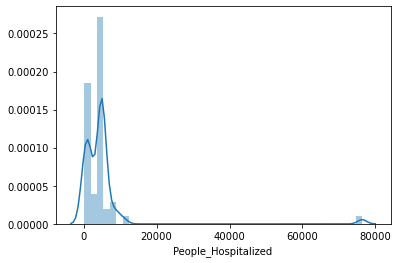

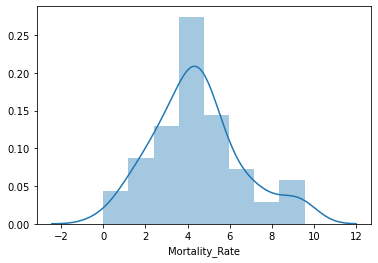

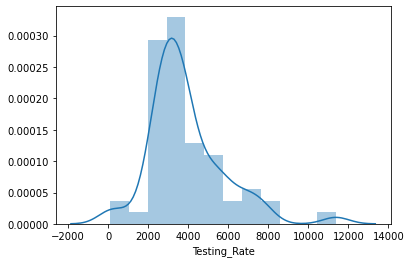

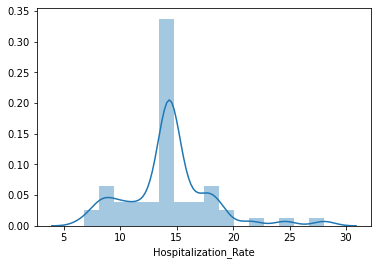

In [30]:
#Plotting distplot for checking the distribution of skewness
for col in df.describe().columns:
    sns.distplot(df[col])
    plt.show()

Most of the features are not normally distributed and it is due to the presence of outliers.

# Checking outliers

We can check outliers by plotting boxplot

In [31]:
collist=df.columns.values 
ncol=11
nrows=11

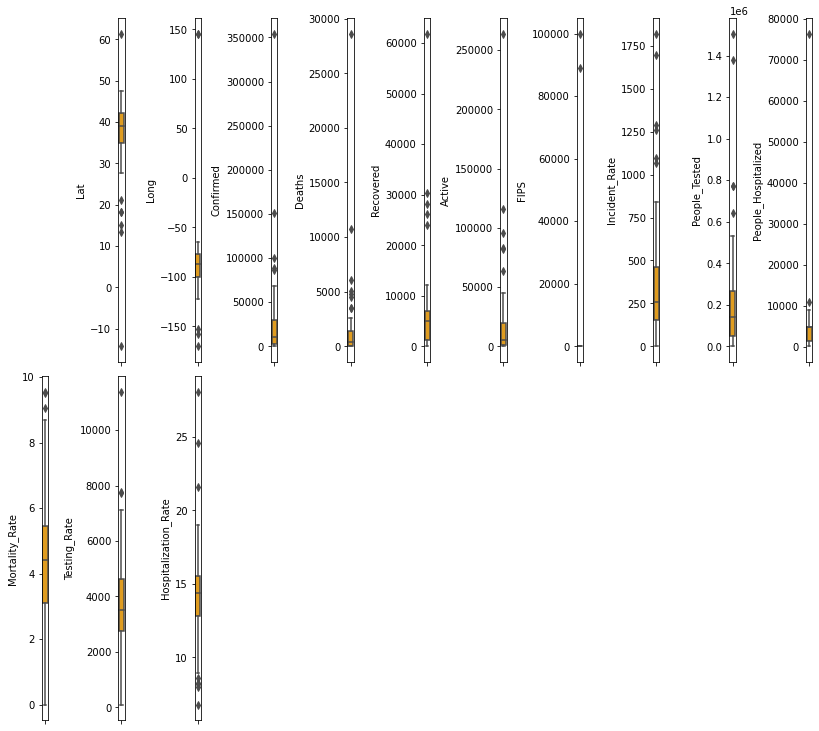

In [32]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient='v')
    plt.tight_layout()

All the features are having outliers and we need to handle them by using z-score 

# Handling outliers by using z-score method

In [33]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([ 2,  5,  7,  9, 13, 14, 34, 36, 36, 36, 36, 36, 36, 36, 39, 45],
       dtype=int64),
 array([ 1,  9, 13,  7,  7,  2,  8,  3,  4,  5,  6,  8,  9, 10,  2, 12],
       dtype=int64))

In [34]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,Province_State,Lat,Long,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,7007.428571,12530,1,266.194321,164450.0,1493.000000,3.999387,3353.942386,11.438860
1,1,61.3707,-152.4044,401,10,352.000000,39,2,54.815493,37045.0,4897.454545,2.493766,5063.940017,14.342541
3,3,33.7298,-111.4312,14906,747,3773.000000,10386,4,204.788838,165435.0,1792.000000,5.011405,2272.859351,12.022005
4,4,34.9697,-92.3731,5003,107,3852.000000,1044,5,165.782801,96258.0,535.000000,2.138717,3189.670370,10.693584
6,6,39.0598,-105.3111,22797,1299,3478.000000,18020,8,395.868121,131837.0,3955.000000,5.698118,2289.339188,17.348774
8,8,39.3185,-75.5071,8194,310,3965.000000,3919,10,841.476990,45412.0,4897.454545,3.783256,4663.552976,14.342541
10,10,38.8974,-77.0268,7551,407,1059.000000,6085,11,1069.927127,40419.0,4897.454545,5.390015,5727.106946,14.342541
11,11,27.7663,-81.6868,47471,2096,7007.428571,45375,12,221.024217,771348.0,8934.000000,4.415327,3591.383953,18.819911
12,12,33.0406,-83.6431,39801,1697,7007.428571,38104,13,374.864974,402940.0,7107.000000,4.263712,3795.082856,17.856335
15,15,21.0943,-157.4983,643,17,578.000000,48,15,45.413710,46304.0,82.000000,2.643857,3270.352122,12.752722


In [35]:
df.shape    #Original dataset dimensions

(58, 14)

In [36]:
df_new.shape   #New dataset dimensions

(48, 14)

10 rows had outliers and they had been handled by using z-score method

# Treating skewness

In [37]:
#We are treating skewness by using cube root transform and square root transform
for col in df_new.skew().index:
    if col in df_new.describe().columns:
        if df_new[col].skew()>0.55:
            df_new[col]=np.log1p(df_new[col])

In [38]:
df_new.skew()   #Checking skewness after treating it

Province_State         -0.081483
Lat                    -0.445644
Long                   -1.338086
Confirmed              -0.833644
Deaths                 -0.374178
Recovered              -0.758299
Active                 -1.176173
FIPS                    0.400546
Incident_Rate          -0.182112
People_Tested          -1.247745
People_Hospitalized     0.247090
Mortality_Rate          0.483833
Testing_Rate           -3.760679
Hospitalization_Rate    0.152571
dtype: float64

# Preparing dataset for model training

We need to split independent and dependent variables from the dataset in order to perform further analysis

In [39]:
df_x=df_new.drop('Deaths',axis=1)   #Independent variables
y=df_new['Deaths']    #Dependent or Target Variable

In [40]:
#Checking x data
df_x.head()

,Province_State,Lat,Long,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,9.476773,8.854869,9.435961,1,5.587976,12.010368,1493.000000,3.999387,8.118190,11.438860
1,1,61.3707,-152.4044,5.996452,5.866468,3.688879,2,4.022051,10.519916,4897.454545,2.493766,8.530098,14.342541
3,3,33.7298,-111.4312,9.609586,8.235891,9.248310,4,5.326851,12.016340,1792.000000,5.011405,7.729234,12.022005
4,4,34.9697,-92.3731,8.517993,8.256607,6.951772,5,5.116692,11.474798,535.000000,2.138717,8.067986,10.693584
6,6,39.0598,-105.3111,10.034428,8.154500,9.799293,8,5.983604,11.789329,3955.000000,5.698118,7.736455,17.348774


# Scaling the data

Sometimes model can be biased to higher values in dataset, so it is better to scale the dataset so that we can bring all the columns in common range. We can use StandardScaler here.

In [41]:
#Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,Province_State,Lat,Long,Confirmed,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,-1.827218,-0.825672,0.331964,0.293296,0.613437,0.566418,-1.690795,0.081326,0.340612,-0.760883,-0.159631,0.063105,-0.743244
1,-1.766689,3.068973,-3.065835,-1.982595,-1.732623,-2.047077,-1.634823,-1.935130,-0.858988,0.632047,-0.976835,0.732151,0.108223
2,-1.645631,-0.636439,-0.940427,0.380146,0.127505,0.481084,-1.522881,-0.254927,0.345419,-0.638547,0.389660,-0.568662,-0.572244
3,-1.585102,-0.470224,0.048176,-0.333681,0.143769,-0.563271,-1.466910,-0.525550,-0.090445,-1.152848,-1.169544,-0.018439,-0.961786
4,-1.464044,0.078076,-0.622958,0.657964,0.063609,0.731644,-1.298997,0.590780,0.162708,0.246443,0.762386,-0.556933,0.989762


# Building the model

In [42]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [43]:
#Finding the best random state and accuracy
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,',the model performs well')
        print('Training r2_score is: ',r2_score(y_train,pred_train)*100)
        print('Testing r2_score is: ',r2_score(y_test,pred_test)*100)

At random state 20 ,the model performs well
Training r2_score is:  99.52905977882139
Testing r2_score is:  99.50179851156255
At random state 91 ,the model performs well
Training r2_score is:  99.54605797594921
Testing r2_score is:  99.45748209532735
At random state 104 ,the model performs well
Training r2_score is:  99.52870467781274
Testing r2_score is:  99.45181577564713
At random state 136 ,the model performs well
Training r2_score is:  99.54291150417173
Testing r2_score is:  99.5284116327122
At random state 194 ,the model performs well
Training r2_score is:  99.52648777940321
Testing r2_score is:  99.50571498751096
At random state 222 ,the model performs well
Training r2_score is:  99.5119572514796
Testing r2_score is:  99.54495026680405
At random state 239 ,the model performs well
Training r2_score is:  99.5189743918056
Testing r2_score is:  99.52929691962446
At random state 251 ,the model performs well
Training r2_score is:  99.50272032315627
Testing r2_score is:  99.508246513536

We can see that at random_state=401, the best r2_score is obtained so that we can create our train_test_split with this random state

In [44]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=401,test_size=.20)

# Finding the best model

We are going to use LinearRegression, Lasso, ElasticNet, Ridge, SVR, DecisionTreeRegressor and KNeighborsRegressor algorithms for finding out the best model among those

In [45]:
#Importing required metrices and model for the dataset
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [46]:
LR=LinearRegression()
l=Lasso()
en=ElasticNet()
rd=Ridge()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

In [47]:
models= []
models.append(('Linear Regression',LR))
models.append(('Lasso Regression',l))
models.append(('Elastic Net Regression',en))
models.append(('Ridge Regression',rd))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))

In [48]:
#Importing required metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [49]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
sd=[]
mae=[]
mse=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('r2_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    std=cross_val_score(model,x,y,cv=5,scoring='r2').std()
    print('Standard Deviation: ',std)
    sd.append(std)
    print('\n')
    MAE=mean_absolute_error(y_test,pre)
    print('Mean Absolute Error: ',MAE)
    mae.append(MAE)
    print('\n')
    MSE=mean_squared_error(y_test,pre)
    print('Mean Squared Error: ',MSE)
    mse.append(MSE)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


r2_score:  0.9962790368069612


cross_val_score:  0.9869765844773623


Standard Deviation:  0.006321349356518733


Mean Absolute Error:  0.08014993812073823


Mean Squared Error:  0.00813922444532505


Root Mean Squared Error:  0.090217650409025



****************************** Lasso Regression ***************************


Lasso()


r2_score:  0.5578800544213226


cross_val_score:  0.45852124405741373


Standard Deviation:  0.11072401554706836


Mean Absolute Error:  0.6831392194226706


Mean Squared Error:  0.9670919281200627


Root Mean Squared Error:  0.9834083221734818



****************************** Elastic Net Regression ***************************


ElasticNet()


r2_score:  0.7120825714104935


cross_val_score:  0.6605740445167971


Standard Deviation:  0.06747408120164139


Mean Absolute Error:  0.5691767899672


Mean Squared Error:  0.629789775237467


Root Mean Squared Err

In [50]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'r2_score': score, 'Cross_val_score':cvs, 'Standard_deviation':sd,
                     'Mean_absolute_error':mae, 'Mean_squared_error':mse, 'Root_Mean_Squared_error':rmse})
result

,Model,r2_score,Cross_val_score,Standard_deviation,Mean_absolute_error,Mean_squared_error,Root_Mean_Squared_error
0,Linear Regression,99.627904,98.697658,0.006321,0.080150,0.008139,0.090218
1,Lasso Regression,55.788005,45.852124,0.110724,0.683139,0.967092,0.983408
2,Elastic Net Regression,71.208257,66.057404,0.067474,0.569177,0.629790,0.793593
3,Ridge Regression,99.589819,98.519066,0.008767,0.079476,0.008972,0.094722
4,Support Vector Regressor,87.929711,67.043528,0.196467,0.415245,0.264025,0.513834
5,Decision Tree Regressor,65.605535,73.921306,0.120222,0.698783,0.752344,0.867377
6,KNeighbors Regressor,84.622508,74.263366,0.103862,0.406628,0.336367,0.579971


From the above algorithms we used, Linear Regression and Ridge Regression are performing well as they are giving the highest r2_scores and cross_val_score respectively. The errors are also very less compared to other algorithms. Now we will perform Hyperparameter Tuning to finding out the best parameters and trying to increase the scores.

# Hyperparameter Tuning

Linear Regression

In [51]:
#Creating parameter list to pass in GridSearchCV
parameters={'fit_intercept':[True,False],'copy_X':[True,False],'normalize':[True,False]}

In [52]:
#Using GridSearchCV to run the parameters and checking final r2_score
from sklearn.model_selection import GridSearchCV
LR=LinearRegression()
grid=GridSearchCV(LR,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.9831691904308905


In [53]:
#Using the best parameters obtained
LR=LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
print('Final r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(LR,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(LR,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

Final r2_score after tuning is:  99.6279036806961
Cross validation score:  98.69765844773622
Standard deviation:  0.006321349356518923


Mean absolute error:  0.0801499381207353
Mean squared error:  0.008139224445325359
Root Mean squared error:  0.09021765040902671


Ridge

In [54]:
#Creating parameter list to pass in GridSearchCV
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','lsqr','svd','sag'],'random_state':range(42,100)}

In [55]:
#Using GridSearchCV to run the parameters and checking final r2_score
from sklearn.model_selection import GridSearchCV
rd=Ridge()
grid=GridSearchCV(rd,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'alpha': 0.001, 'random_state': 68, 'solver': 'sag'}
0.983350675582568


In [56]:
#Using the best parameters obtained
rd=Ridge(alpha=0.001, random_state=68, solver='sag')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('Final r2_score after tuning is: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(rd,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(rd,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

Final r2_score after tuning is:  99.62234035062481
Cross validation score:  98.79462059461612
Standard deviation:  0.00574422579633955


Mean absolute error:  0.08208543883021875
Mean squared error:  0.00826091657116609
Root Mean squared error:  0.09088958450320966


After applying Hyperparameter Tuning, we can see that the scores of Ridge has improved, i.e, r2_score from 99.58 to 99.62 and cross validation score from 98.51 to 98.79 and the error metrics values have also decreased. Lesser the RMSE score, better the model. Now we will try Ensemble Techniques like RandomForestRegressor, AdaBoostRegressor and GradientBoostingRegressor to boost up our scores.

# Ensemble Techniques for boosting the scores

In [57]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=401)   #Using the best random state we obtained
parameters={'criterion':['mse','mae'],'n_estimators':[10,50,100,500,1000,1200],'max_features':['auto','sqrt','log2']}
grid=GridSearchCV(rfr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 500}
0.8554328223893112


In [58]:
#Using the best parameters obtained
RF=RandomForestRegressor(random_state=401, criterion='mae', n_estimators=500, max_features='auto')
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('r2_score: ',r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(RF,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(RF,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  81.98499571286943
Cross validation score:  86.49118370229696
Standard deviation:  0.06847542013319807


Mean absolute error:  0.516066714405742
Mean squared error:  0.3940596981737376
Root Mean squared error:  0.6277417448073193


In [59]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor(random_state=401)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500,1000,1200],'learning_rate':[0.001,0.01,0.1,1],'loss':['linear','square']}
grid=GridSearchCV(adr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'learning_rate': 0.001, 'loss': 'linear', 'n_estimators': 100}
0.8613178108980879


In [60]:
#Using the best parameters obtained
adr=AdaBoostRegressor(random_state=401, n_estimators=100, learning_rate=0.001, loss='linear')
adr.fit(x_train,y_train)
pred=adr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(adr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(adr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  74.25751979694594
Cross validation score:  81.7461151387892
Standard deviation:  0.10498670695986433


Mean absolute error:  0.5451806358262606
Mean squared error:  0.563090289481949
Root Mean squared error:  0.750393423133458


In [61]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=401)   #Using the best random state we obtained
parameters={'n_estimators':[10,50,100,500,1000,1200],'learning_rate':[0.001,0.01,0.1,1],'loss':['ls','lad','huber']}
grid=GridSearchCV(gbr,parameters,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(grid.best_params_)  #Printing the best parameters obtained
print(grid.best_score_) #Mean cross-validated score of best_estimator

{'learning_rate': 0.01, 'loss': 'huber', 'n_estimators': 1200}
0.8557824860525622


In [62]:
#Using the best parameters obtained
gbr=GradientBoostingRegressor(random_state=401, n_estimators=1200, learning_rate=0.01, loss='huber')
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
print("r2_score: ",r2_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').mean()*100)
print('Standard deviation: ',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())
print('\n')
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score:  85.85239500353968
Cross validation score:  87.24372411708036
Standard deviation:  0.08688607247284544


Mean absolute error:  0.42842905942009973
Mean squared error:  0.309464314630724
Root Mean squared error:  0.5562951686206918


After applying the Ensemble Techniques and Hyperparameter Tuning, we can say that Ridge Regression is the best working algorithm among all as it gives less RMSE scores, increased r2_score and cross validation score after Tuning. We will finalize the model.

# Finalizing the model

In [63]:
rd_prediction=rd.predict(x)  #Predicted values

In [64]:
#Saving the predictions in a Dataframe
pred_results=pd.DataFrame(rd_prediction)
pred_results.to_csv('US_Covid19Project_Regression_Results.csv')

# Saving the model

In [65]:
import joblib
joblib.dump(rd,'US_Covid19_Project_Regression.obj')

['US_Covid19_Project_Regression.obj']

# Conclusion

-> After analysing the dataset, we got various insights about the covid19 cases in various parts of USA.

-> First we loaded the dataset and did the EDA process and other pre-processing techniques like skewness check and removal,        handling the outliers present, filling the missing data, visualizing the distribution of data,etc.

-> We came to know that NewYork had the maximum number of cases.

-> We also observed that as the confirmed cases were increasing, the deaths were also increasing.

-> Then we did the model training, building the model and finding out the best model on the basis of r2_score, cross_val_score      and based on different metrices scores we got like Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, etc.

-> We got Ridge Regression and Linear Regression as the best algorithms among all as the accuracy score was 99% and cross          validation score was between 98-99% and also it had the least RMSE value. Then for finding out the best parameter and            improving the scores, we performed Hyperparameter Tuning in all these 2 algorithms.

-> After Tuning, we got that Ridge Regression algorithm is the best working algorithm as the scores have been increased, i.e,      r2_score from 99.58 to 99.62 and cross validation score from 98.51 to 98.79 and the error metrics values have also decreased.    Lesser the RMSE score, better the model.

-> We tried Ensemble Techniques like RandomForest Regressor, AdaBoost Regressor and GradientBoosting Regressor algorithms          inorder to boost up our scores we got. But there were more errors as compared to Linear and Ridge regression algorithms so      that we selected Ridge as the best performing model.

-> We finalized the model by saving the predicted values in a csv file and also saving the model in an obj format.

-> Overall, we can say that this dataset works very well for algorithms like Linear, Ridge, SVR, etc. and it was very much used    in predicting the number of deaths occured in different regions of USA.